In [188]:
import numpy as np
from mrmustard.lab import Interferometer, SqueezedVacuum, Number
from mrmustard.physics.wigner import wigner_discretized
import matplotlib.pyplot as plt

In [199]:
%%time
seed = 42
rng = np.random.default_rng()

N = 4
max_r = 1.5
max_n = 4
xvec = np.linspace(-2.5, 2.5, 11)
pvec = np.linspace(-2.5, 2.5, 11)

squeezing_params = rng.uniform(0, max_r, size=N)
input_state = [SqueezedVacuum(i, r) for i, r in enumerate(squeezing_params)]
interferometer = Interferometer.random(range(N))
photon_numbers = rng.integers(0, max_n + 1, size=N-1)
measurement = [Number(i, n).dual for i, n in enumerate(photon_numbers)]
c = Circuit(input_state) >> interferometer >> Circuit(measurement)
out = c.contract().normalize()
wig, X, P = wigner_discretized(out.dm().ansatz.array, xvec, pvec)

print(f'Squeezing: {squeezing_params}')
print(f'Photon numbers: {photon_numbers}\n')
out

Squeezing: [0.4189925  1.1528463  1.42761819 0.75409501]
Photon numbers: [1 4 4]

CPU times: user 210 ms, sys: 21.6 ms, total: 232 ms
Wall time: 94.7 ms


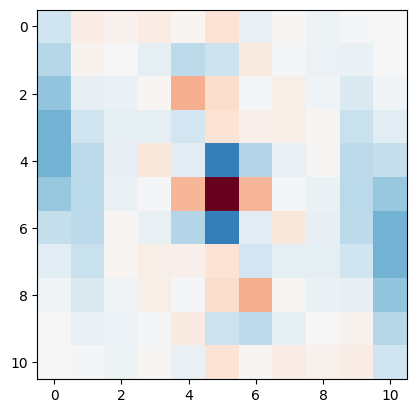

In [200]:
plt.imshow(wig.T, vmin=-1/np.pi, vmax=1/np.pi, cmap='RdBu')